[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JinmiaoChenLab/DISCOtoolkit_py/blob/main/docs/scEnrichment.ipynb)
# scEnrichment

In this tutorial, we will provide a quick guideline for applying the scEnrichment feature of discotoolkit on DEGs (Differentially Expressed Genes). Follow these steps:

1. First, we load the DEGs from Example 1, available on the [DISCO](http://www.immunesinglecell.org/) website.
2. Finally, we convert the retrieved data into a Pandas DataFrame, which will serve as the input for the `dt.CELLiD_enrichment` function. By running this function, we can obtain the desired enrichment analysis.

In [1]:
# for google colab
# pip install discotoolkit
# import package

import discotoolkit as dt
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# adding ignore warning to clean the code
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

sns.set_theme(rc={'figure.dpi': 300})

The user can input either a gene list or a gene list with log fold change as the input to the `dt.CELLiD_enrichment` function.

Example of the DEGs:

In [2]:
# testing DEG from DEGs of acinar cell(Peng, Junya et al.)
# Reference is in DISCO website

test_genes = {"gene":["PRSS1", "CTRB2", "CELA3A", "CTRB1", "REG1B", "CLPS", "CPB1", "CPA1", "PLA2G1B", "REG3A", "CTRC"],
            #   "fc":[5.236605052, 5.179753462, 4.724315075, 4.702706704, 4.65145949, 4.513887613, 4.351968886, 4.311988687, 4.272185339, 4.253882194, 4.208933992]
              }

deg_df = pd.DataFrame(test_genes)

deg_df.head()

,gene
0,PRSS1
1,CTRB2
2,CELA3A
3,CTRB1
4,REG1B


Now that we have our data ready, we can proceed to run the function.

In [3]:
# get enrichment analysis result using dt.CELLiD_enrichment
results = dt.CELLiD_enrichment(deg_df)

INFO:root:Comparing the ranked gene list to reference gene sets...
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done 1012 tasks      | elapsed:    8.6s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:   14.5s
[Parallel(n_jobs=1)]: Done 1984 tasks      | elapsed:   22.2s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:   31.2s
[Parallel(n_jobs=1)]: Done 3280 tasks      | elapsed:   40.5s


In [4]:
# get the top 10 results
results.head(10)

,pval,or,name,gene,background,overlap,geneset
32,0.0,842.815,Acinar cell vs All others in pancreas,"CTRC,CELA3A,REG1B,REG3A,CPB1,CLPS,CPA1,PRSS1,P...",5783,11,91
42,0.0,743.688,Acinar cell vs Ductal/EC doublet like cell in ...,"CTRB2,PRSS1,CPB1,CPA1,CTRC,CTRB1,CELA3A,PLA2G1...",9711,11,164
22,0.0,569.849,Acinar cell vs TUBA1A+ ductal cell in pancreas,"CTRB2,CTRB1,CELA3A,PRSS1,PLA2G1B,CTRC,CPB1,CPA...",5783,11,129
82,0.0,531.813,Acinar cell vs HSP+ pancreatic ductal cell in ...,"CTRC,CTRB2,CTRB1,CELA3A,CPB1,PRSS1,CPA1,CLPS,P...",9711,11,224
40,0.0,519.397,Acinar cell vs Pancreatic ductal cell in PDAC,"PRSS1,CTRB1,CTRC,CELA3A,CTRB2,CPB1,CPA1,CLPS,P...",9711,11,229
41,0.0,507.536,Acinar cell vs CCL2+ pancreatic ductal cell in...,"PRSS1,CELA3A,CTRC,CTRB1,CPB1,CPA1,CTRB2,CLPS,P...",9711,11,234
54,0.0,505.227,Acinar cell vs All others in PDAC,"CTRC,CELA3A,CPB1,CLPS,CPA1,PRSS1,PLA2G1B,CTRB2...",9711,11,235
81,0.0,293.242,KLRB1 CD8 T cell vs XCL1 NK cell in PDAC,"CLPS,PRSS1,CTRB1,CPA1,CELA3A,CTRC,CPB1,CTRB2,P...",9711,9,117
8,0.0,227.122,Paneth cell vs Goblet cell in intestine,"REG3A,REG1B",11184,2,50
77,0.0,189.087,KLRB1 CD8 T cell vs CXCL13 exhausted CD8 T cel...,"CPA1,CLPS,CTRB1,CPB1,CTRC,CTRB2,PRSS1,CELA3A,P...",9711,9,176


We can visualize the results using a horizontal barplot with the help of the `seaborn` library.

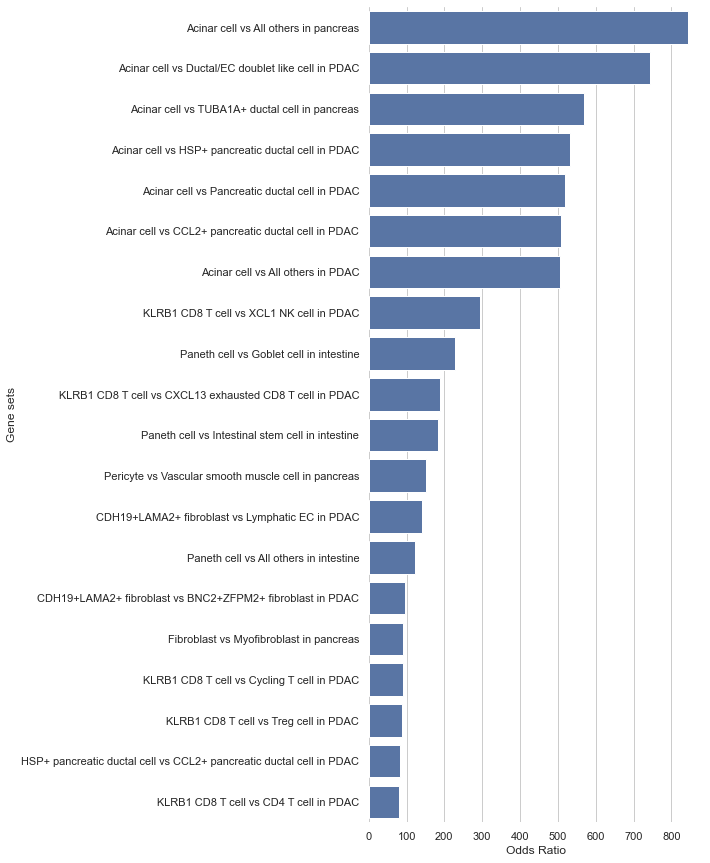

In [5]:
# setting the theme to whitegrid
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# plot only the top 20 results
sns.barplot(x="or", y="name", data=results.head(20), color="b")

# adding axis title
ax.set(ylabel="Gene sets",
       xlabel="Odds Ratio")

# make the plot look cleaner and nicer
sns.despine(left=True, bottom=True)